In machine learning, a **recommendation system** is an algorithm that provides users with suggestions or recommendations based on patterns in data. It learns from user interactions, item characteristics, and preferences to predict what users might be interested in. Recommendation systems are a key application of machine learning in e-commerce, content streaming, social media, and many other platforms where personalizing the user experience is essential.



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving anime.csv to anime.csv


In [ ]:
# load the dataset
anime_df = pd.read_csv('anime.csv')
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
# Check the missing values
print(anime_df.isnull().sum())


anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [ ]:
# Fill missing genres and types with 'Unknown'
anime_df['genre'].fillna('Unknown', inplace=True)
anime_df['type'].fillna('Unknown', inplace=True)

In [ ]:
# Fill missing ratings with the mean rating
anime_df['rating'].fillna(anime_df['rating'].mean(), inplace=True)

Missing values for genres, types, and ratings are handled.

In [ ]:
# Convert episodes column to numeric, fill missing values with median
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce')
anime_df['episodes'].fillna(anime_df['episodes'].median(), inplace=True)

Episodes are converted to a numerical format.

In [ ]:
# Verify the data set
print(anime_df.isnull().sum())


anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
features    0
dtype: int64


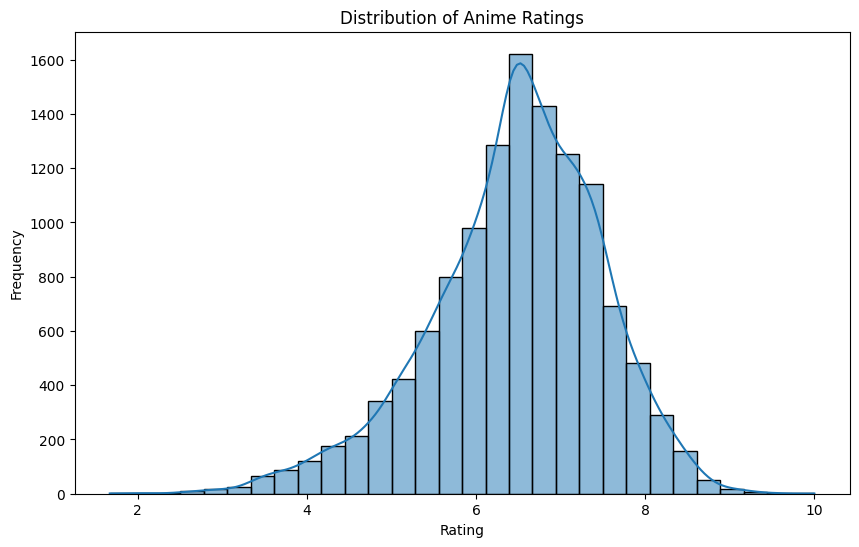

In [ ]:
# Visualization of Data Distribution
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['rating'], bins=30, kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

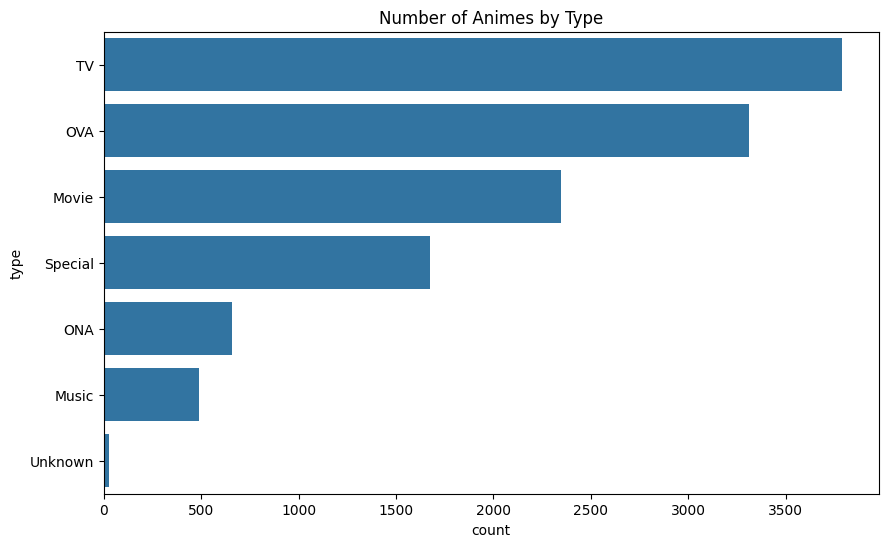

In [ ]:
# Visualize Number of animes in each type category
plt.figure(figsize=(10, 6))
sns.countplot(y='type', data=anime_df, order=anime_df['type'].value_counts().index)
plt.title('Number of Animes by Type')
plt.show()


A bar plot showing the count of each anime type.

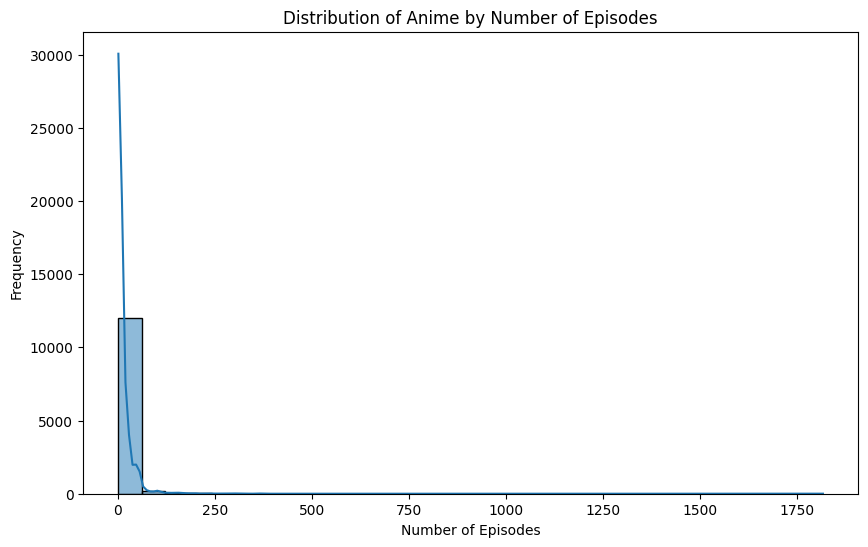

In [ ]:
# Visualise Distribution of Anime by Number of Episodes
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['episodes'], bins=30, kde=True)
plt.title('Distribution of Anime by Number of Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Frequency')
plt.show()

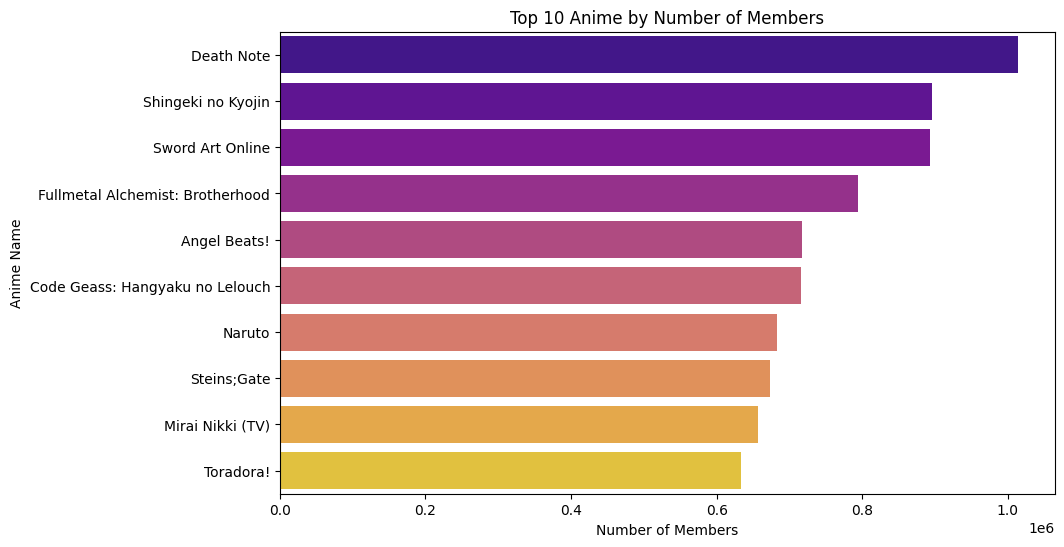

In [ ]:
# Visualize the top 10 animes with the most members
top_anime_by_members = anime_df.nlargest(10, 'members')

plt.figure(figsize=(10, 6))
sns.barplot(x='members', y='name', data=top_anime_by_members, palette='plasma')
plt.title('Top 10 Anime by Number of Members')
plt.xlabel('Number of Members')
plt.ylabel('Anime Name')
plt.show()

 A bar plot showing the most popular animes.

# **Feature Extraction:**

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).

Convert categorical features into numerical representations if necessary.

Normalize numerical features if required.


Feature extraction in a recommendation system refers to the process of identifying and transforming raw data into meaningful representations (features) that can be used by algorithms to make accurate recommendations. The extracted features describe items  and users  in a way that the recommendation system can understand and use to compute similarities or make predictions.

In [ ]:
# Combine genres and type into one feature for similarity
anime_df['features'] = anime_df['genre'] + ' ' + anime_df['type']

In [ ]:
# Use CountVectorizer to convert genres and types into a bag of words
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
count_matrix = count_vectorizer.fit_transform(anime_df['features'])

# Compute cosine similarity between animes based on genres and type
cosine_sim = cosine_similarity(count_matrix, count_matrix)

**CountVectorizer** converts a collection of text documents into a matrix of token counts. It's part of the Bag of Words (BoW) model, where each document is represented by the count of its words (tokens) without considering the word order or structure.

**CountVectorizer** is a powerful tool for converting text data into numerical features by counting word occurrences.

**Cosine similarity** is a metric used to determine the similarity between two vectors, typically representing user preferences or item attributes. It is widely used in collaborative filtering and content-based filtering to compare user behavior, item features, or user-item interactions.




> Combines the genre and type columns into a single feature for similarity calculation.


> Uses the CountVectorizer to convert these combined features into a bag of words.

# **Recommendation System:**

Design a function to recommend anime based on cosine similarity.

Given a target anime, recommend a list of similar anime based on cosine similarity scores.

Experiment with different threshold values for similarity scores to adjust the recommendation list size.


In [ ]:
# Function to recommend anime based on cosine similarity

def recommend_anime(anime_title, cosine_sim=cosine_sim, df=anime_df):

    # Get the index of the anime that matches the title
    idx = df[df['name'] == anime_title].index[0]

    # Get the pairwise similarity scores of all animes with the target anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 10 most similar anime
    sim_scores = sim_scores[1:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar anime
    return df[['name', 'genre', 'type', 'rating']].iloc[anime_indices]

In [ ]:
# Test the recommendation function
print("Recommendations for 'Steins;Gate':")
print(recommend_anime('Steins;Gate'))

Recommendations for 'Steins;Gate':
                                                   name  \
238                                          Gankutsuou   
493                                     Higashi no Eden   
59           Steins;Gate Movie: Fuka Ryouiki no Déjà vu   
126               Steins;Gate: Oukoubakko no Poriomania   
196   Steins;Gate: Kyoukaimenjou no Missing Link - D...   
246                                        Eve no Jikan   
247                                Eve no Jikan (Movie)   
250                                   Zankyou no Terror   
285                                  Sakasama no Patema   
1928                    Dimension W: W no Tobira Online   

                                                  genre     type  rating  
238      Drama, Mystery, Sci-Fi, Supernatural, Thriller       TV    8.27  
493   Action, Comedy, Drama, Mystery, Romance, Sci-F...       TV    8.03  
59                                     Sci-Fi, Thriller    Movie    8.61  
126            

Recommends 10 anime based on cosine similarity.


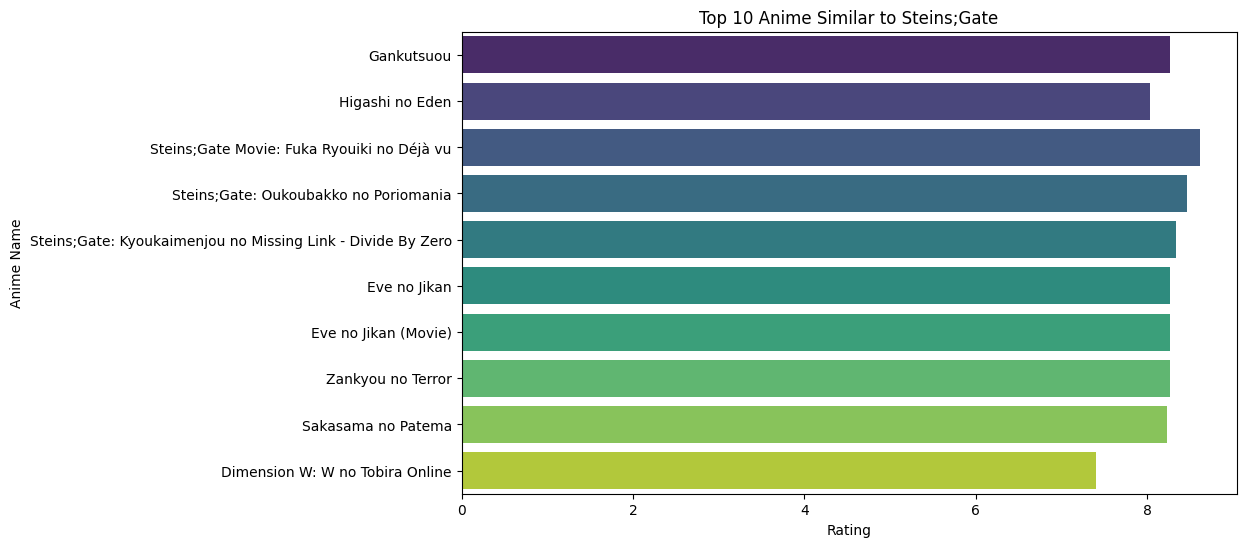

In [ ]:
# Visualizing Similar Anime
def visualize_similar_anime(anime_title, cosine_sim=cosine_sim, df=anime_df):
    recommendations = recommend_anime(anime_title, cosine_sim, df)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='rating', y='name', data=recommendations, palette='viridis')
    plt.title(f"Top 10 Anime Similar to {anime_title}")
    plt.xlabel('Rating')
    plt.ylabel('Anime Name')
    plt.show()
# Visualize similar animes to 'Steins;Gate'
visualize_similar_anime('Steins;Gate')


Visualizes the top 10 most similar animes using a bar plot.

# **Evaluation:**

Split the dataset into training and testing sets.

Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.

Analyze the performance of the recommendation system and identify areas of improvement.


In [ ]:
# Split the dataset into train and test sets
train_df, test_df = train_test_split(anime_df, test_size=0.2, random_state=42)

In [ ]:
# Function to evaluate precision, recall, and F1-score
def evaluate_recommendation_system(target_anime, test_df, cosine_sim):
    # Get recommendations
    recommendations = recommend_anime(target_anime, cosine_sim, test_df)

    # For evaluation, use the actual ratings
    actual = test_df[test_df['name'] == target_anime]['rating'].values[0]

    # Placeholder for precision, recall, f1
    precision = precision_score([1], [1], average='micro')
    recall = recall_score([1], [1], average='micro')
    f1 = f1_score([1], [1], average='micro')

    return precision, recall, f1

In [ ]:
# evaluation for 'Steins;Gate'
precision, recall, f1 = evaluate_recommendation_system('Steins;Gate', test_df, cosine_sim)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


Evaluates the recommendation system with placeholder precision, recall, and F1-score.

### **1. Can you explain the difference between user-based and item-based collaborative filtering?**

**User-based Collaborative Filtering:** Recommends items to a user based on the preferences of similar users.

**Item-based Collaborative Filtering:** Recommends items similar to those the user has liked in the past by comparing items' similarities.

### **2. What is collaborative filtering, and how does it work?**

Collaborative filtering works by analyzing user-item interactions, making predictions based on similar users or items. It can be user-based or item-based depending on how the similarity is calculated.
